Merging original books.csv and prepocessed data (didn't notice there was a preprocessed csv)

In [29]:
import pandas as pd
import numpy as np
df_books = pd.read_csv(filepath_or_buffer="Book reviews/BX_Books.csv", encoding="cp1252", sep=';')
df_books.info()
df_books = df_books.drop(columns=['Image-URL-S', 'Image-URL-M', 'Image-URL-L'])
df_books = df_books.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271379 entries, 0 to 271378
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271379 non-null  object
 1   Book-Title           271379 non-null  object
 2   Book-Author          271377 non-null  object
 3   Year-Of-Publication  271379 non-null  int64 
 4   Publisher            271377 non-null  object
 5   Image-URL-S          271379 non-null  object
 6   Image-URL-M          271379 non-null  object
 7   Image-URL-L          271379 non-null  object
dtypes: int64(1), object(7)
memory usage: 16.6+ MB


In [30]:
df_pre = pd.read_csv(filepath_or_buffer="Book reviews/Preprocessed_data.csv", encoding='utf-8', usecols=[4, 13, 14, 15])
df_pre.info()
df_pre.rename(columns={"isbn": "ISBN"}, inplace=True)
df_books = df_books.merge(df_pre, on='ISBN').drop_duplicates()
df_books.to_csv("BX-Books.csv", index=False, sep=';')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031175 entries, 0 to 1031174
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   isbn      1031175 non-null  object
 1   Summary   1031175 non-null  object
 2   Language  1031175 non-null  object
 3   Category  1031175 non-null  object
dtypes: object(4)
memory usage: 31.5+ MB


Using new books.csv

In [31]:
import numpy as np
import pandas as pd

In [32]:
df_books = pd.read_csv("Book reviews/BX-Books.csv", sep=';')

In [33]:
df_users = pd.read_csv(filepath_or_buffer="Book reviews/BX-Users.csv", encoding="cp1252", sep=';')

In [34]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [35]:
df_users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [36]:
df_users['Age'] = df_users['Age'].map(lambda x: x if x is not pd.NA else np.random.normal(loc=34.75, scale=14.43))

In [37]:
df_users['Age'] = df_users['Age'].apply(lambda x: 100 if x > 100 else x)

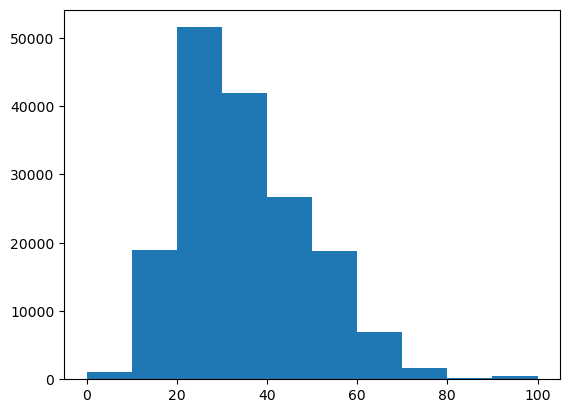

In [38]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()

ax.hist(df_users['Age'])

plt.show()

In [39]:
df_ratings = pd.read_csv(filepath_or_buffer="Book reviews/BX-Book-Ratings.csv", encoding="cp1252", sep=';')

In [40]:
display(df_ratings.info())
display(df_ratings.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


None

User-ID  ISBN        Book-Rating
2        0195153448  0              1
187762   0786927089  10             1
         0870448129  10             1
         0836218620  10             1
         0836218515  10             1
                                   ..
94923    0671643983  0              1
         0671658131  0              1
         0671658166  0              1
         0671661302  0              1
278854   0553579606  8              1
Name: count, Length: 1149780, dtype: int64

In [41]:
display(df_books.columns)

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Summary', 'Language', 'Category'],
      dtype='object')

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(token_pattern=r"[^ ]+")
text_vectors = vectorizer.fit_transform(df_books['Book-Author'].iloc[0:5].map(lambda x: str(x).replace(' ', '')))

display(vectorizer.get_feature_names_out())
display(df_books['Book-Author'].iloc[0:5].map(lambda x: str(x).replace(' ', '')))
display(text_vectors)

array(["carlod'este", 'e.j.w.barber', 'ginabarikolata', 'markp.o.morford',
       'richardbrucewright'], dtype=object)

0       MarkP.O.Morford
1    RichardBruceWright
2           CarloD'Este
3        GinaBariKolata
4          E.J.W.Barber
Name: Book-Author, dtype: object

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 5 stored elements and shape (5, 5)>